# 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

# Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Model Saving
import pickle

# 2. Data Loading

In [2]:
data_agriculture = pd.read_csv("data/Agriculture_Dataset/agriculture_dataset.csv")
display(data_agriculture)
display(data_agriculture.info())

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69
5,F006,Sugarcane,12.50,Sprinkler,6.42,2.25,38.18,Loamy,Zaid,46487.98
6,F007,Soybean,360.06,Drip,1.83,2.37,44.93,Sandy,Rabi,40583.57
7,F008,Rice,464.60,Drip,5.18,0.91,4.23,Silty,Kharif,9392.38
8,F009,Maize,389.37,Drip,0.57,4.93,3.86,Peaty,Rabi,60202.14
9,F010,Soybean,184.37,Drip,2.18,2.67,17.25,Sandy,Kharif,90922.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB


None

In [3]:
data_soil = pd.read_csv("data/Soil_Measures/soil_measures.csv")
display(data_soil)
display(data_soil.info())

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


None

In [4]:
data_main = pd.read_csv("data/Crop_Yield/crop_yield.csv")
display(data_main)
display(data_main.info())

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


None

# 3. Data Preprocessing

### 3.1 Initial Preprocessing

In [5]:
def one_hot_encode(df, column_name):
    try:
        df = pd.get_dummies(df, columns=[column_name], prefix=column_name, drop_first=False)
        df = df.replace({True:1,False:0})
    finally:
        return df

In [6]:
# Drop unused columns
try:
    data_agriculture_clean = data_agriculture.drop(["Farm_ID", "Season"], axis=1)
except:
    pass

data_agriculture_clean = data_agriculture_clean.groupby(["Crop_Type","Irrigation_Type","Soil_Type"]).mean().reset_index()

# One-hot encode Soil_Type in data_agriculture
data_agriculture_clean = one_hot_encode(data_agriculture_clean, "Soil_Type")

# Modify the irrigation data to match the main dataframe
try:
    data_agriculture_clean["Irrigation_Used"] = data_agriculture_clean["Irrigation_Type"].apply(lambda x: 0 if x == "Rain-fed" else 1)
    data_agriculture_clean = data_agriculture_clean.drop("Irrigation_Type", axis=1)
except:
    pass

data_agriculture_clean.to_csv("data_clean/agriculture_clean.csv")

C:\Users\Saul\AppData\Local\Temp\ipykernel_13484\3742212052.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1,False:0})


In [7]:
data_soil_clean = data_soil.groupby("crop").mean().reset_index()
data_soil_clean.to_csv("data_clean/soil_clean.csv")

In [72]:
data_soil_clean

,crop,N,P,K,ph
0,apple,20.80,134.22,199.89,5.929663
1,banana,100.23,82.01,50.05,5.983893
2,blackgram,40.02,67.47,19.24,7.133952
3,chickpea,40.09,67.79,79.92,7.336957
4,coconut,21.98,16.93,30.59,5.976562
5,coffee,101.20,28.74,29.94,6.790308
6,cotton,117.77,46.24,19.56,6.912675
7,grapes,23.18,132.53,200.11,6.025937
8,jute,78.40,46.86,39.99,6.732778
9,kidneybeans,20.75,67.54,20.05,5.749411


In [8]:
# Drop unused columns
try:
    data_main_clean = data_main.drop(["Region", "Weather_Condition"], axis=1)
except:
    pass

data_main_clean = one_hot_encode(data_main_clean, "Soil_Type")
data_main_clean = one_hot_encode(data_main_clean, "Crop")

data_main_clean = data_main_clean.replace({True:1,False:0})

data_main_clean.to_csv("data_clean/main_clean.csv")

C:\Users\Saul\AppData\Local\Temp\ipykernel_13484\3742212052.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1,False:0})
C:\Users\Saul\AppData\Local\Temp\ipykernel_13484\3742212052.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1,False:0})


### 3.2 Correlation Matrix

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764618,0.001833,-0.001178,-0.000605,0.000526,-0.000591,0.000014,-0.000724,-0.000135,-0.001355,0.000910,0.000846,0.000459
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085565,0.000020,-0.000650,-0.001592,0.001718,0.000494,0.000012,-0.000253,0.001389,-0.001699,-0.000385,0.000270,0.000679
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442099,-0.000759,-0.001697,0.001923,-0.000964,0.000485,0.001009,-0.000609,0.000598,-0.001330,0.000397,-0.000142,0.001087
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741,0.000249,-0.000619,0.000882,0.000957,-0.000742,-0.000725,0.000013,0.000018,0.000418,-0.002774,0.001150,0.001177
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002591,-0.000405,-0.000789,-0.000186,0.001896,-0.000812,0.000297,-0.001196,0.000668,0.000757,0.000101,-0.000673,0.000342
Yield_tons_per_hectare,0.764618,0.085565,0.442099,0.353741,-0.002591,1.000000,0.000902,-0.001206,0.000418,0.000419,-0.000254,-0.000279,-0.000543,0.000361,-0.002132,0.000340,0.001116,0.000861
Soil_Type_Chalky,0.001833,0.000020,-0.000759,0.000249,-0.000405,0.000902,1.000000,-0.199854,-0.200173,-0.199804,-0.200407,-0.200085,-0.000525,0.000246,0.000448,-0.000514,0.002136,-0.001789
Soil_Type_Clay,-0.001178,-0.000650,-0.001697,-0.000619,-0.000789,-0.001206,-0.199854,1.000000,-0.199866,-0.199497,-0.200099,-0.199777,-0.000127,0.000160,-0.000868,0.001540,0.000004,-0.000709
Soil_Type_Loam,-0.000605,-0.001592,0.001923,0.000882,-0.000186,0.000418,-0.200173,-0.199866,1.000000,-0.199816,-0.200418,-0.200096,0.000564,0.000133,0.000594,-0.000576,0.000143,-0.000858
Soil_Type_Peaty,0.000526,0.001718,-0.000964,0.000957,0.001896,0.000419,-0.199804,-0.199497,-0.199816,1.000000,-0.200049,-0.199728,0.000899,-0.000059,0.000569,-0.001050,-0.001753,0.001392


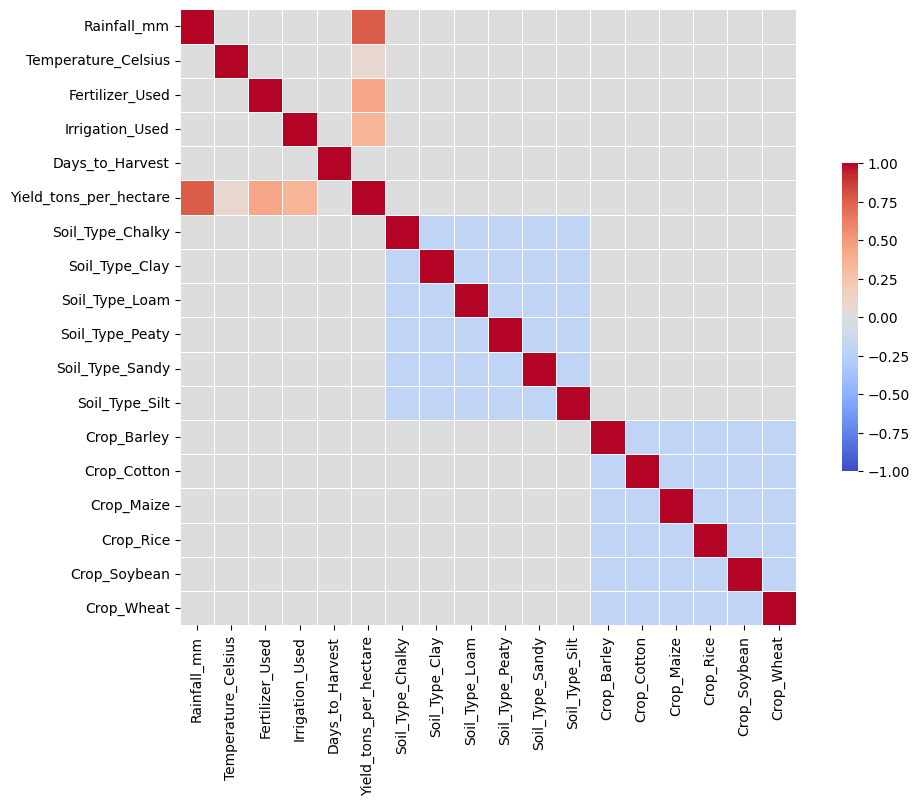

In [9]:
corr = data_main_clean.corr()
display(corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=1, vmin=-1, square=True, linewidths=.5, cmap="coolwarm", cbar_kws={"shrink": .5}) # Most of these arguments are not really useful in this case
plt.show()

### 3.3 Feature Scaling

In [18]:
X = data_main_clean.drop("Yield_tons_per_hectare",axis=1)
y = data_main_clean["Yield_tons_per_hectare"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [19]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [12]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

# 4. Machine Learning

### 4.1 Model Election

In [13]:
# Define the models and the sample size
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree_4": DecisionTreeRegressor(max_depth=4),
    "Decision Tree_5": DecisionTreeRegressor(max_depth=5),
    "Random Forest_50": RandomForestRegressor(n_estimators=50),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Random Forest_200": RandomForestRegressor(n_estimators=200),
    "KNN_3": KNeighborsRegressor(n_neighbors=3),
    "KNN_5": KNeighborsRegressor(n_neighbors=5),
    "KNN_7": KNeighborsRegressor(n_neighbors=7),
    "SVR_rbf": SVR(),
    "SVR_linear": SVR(kernel="linear"),
    "GBR": GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3)
}

sample_size = 200000

In [ ]:
# Check the R2-score of each model and choose the best-performing ones
for name, model in models.items():
    scores = cross_val_score(model, X_train.head(sample_size), y_train.head(sample_size), scoring="r2")
    print(f"{name}: R2-score:\t{np.mean(scores):.5f}")

In [ ]:
# Linear Regression
models["Linear Regression"].fit(X_train.head(sample_size),y_train.head(sample_size))
y_pred_LN = models["Linear Regression"].predict(X_train.tail(sample_size))
r2_LN = r2_score(y_train.tail(sample_size), y_pred_LN)
print(f"R2-score for Linear Regression ({sample_size} samples): {r2_LN:.5f}")

In [ ]:
# Random Forest 
tuned_RF = GridSearchCV(estimator=models["Random Forest"],
                        param_grid={'n_estimators': [50, 100, 150, 200],'max_depth': [10, 20, 30, None]},
                        cv=5,
                        scoring='r2'
                        )
tuned_RF.fit(X_train.head(sample_size),y_train.head(sample_size))
y_pred_RF = tuned_RF.predict(X_train.tail(sample_size))
r2_RF = r2_score(y_train.tail(sample_size), y_pred_RF)
print(f"R2-score for Random Forest ({sample_size} samples): {r2_RF:.5f}\nBest parameters: {tuned_RF.best_params_}")

# RandomForestRegressor(n_estimators=150, max_depth=10) # Results for GridSearchCV (05.11 16:25 R2:0.9098 (20k samples))

In [ ]:
# Support Vector
tuned_SVR = GridSearchCV(estimator=models["SVR_rbf"],
                        param_grid={'kernel': ["linear", "poly", "rbf"]},
                        cv=5,
                        scoring='r2'
                        )
tuned_SVR.fit(X_train.head(sample_size),y_train.head(sample_size))
y_pred_SVR = tuned_SVR.predict(X_train.tail(sample_size))
r2_SVR = r2_score(y_train.tail(sample_size), y_pred_SVR)
print(f"R2-score for Support Vector ({sample_size} samples): {r2_SVR:.5f}\nBest parameters: {tuned_SVR.best_params_}")


In [ ]:
tuned_SVR = SVR(kernel="linear") # Results for GridSearchCV (05.11 16:42 R2:0.9132 (20k samples))

### 4.2 Model Training

In [ ]:
# We now test the best-scoring model with the whole dataset
trained_model = tuned_SVR.fit(X_train,y_train)

[LibSVM]

### 4.3 Model Evaluation

In [16]:
pickle.dump(trained_model, open("trained_model.pkl", "wb"))

In [20]:
y_pred = trained_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2-score for Support Vector: {r2:.5f}")

R2-score for Support Vector: 0.91326
